# Análisis de Ventas Globales

## PASO 2A - Análisis de Dataset "Sales 2012"
Por **Daniel Palacio** (github.com/palaciodaniel) - Noviembre 2021

In [1]:
import pandas as pd
import seaborn as sns

### Carga de dataset y características generales

In [2]:
df_sales2012 = pd.read_excel("Sales 2012.xlsx")
df_sales2012.head(10)

%KEY    Cost  Customer Number       Date  GrossSales Invoice Date  \
0     1 -513.15         10012715 2012-12-31   -573.3835   2012-12-31   
1     2 -105.93         10012715 2012-12-31   -204.6638   2012-12-31   
2     3  -88.07         10012715 2012-12-31   -165.8016   2012-12-31   
3     4  -43.12         10012715 2012-12-31   -118.3703   2012-12-31   
4     5  -37.98         10012715 2012-12-31   -102.3319   2012-12-31   
5     6  -49.37         10012715 2012-12-31    -85.5766   2012-12-31   
6     7  -45.81         10012715 2012-12-31    -68.4399   2012-12-31   
7     8  -12.56         10012715 2012-12-31    -67.3822   2012-12-31   
8     9  -13.42         10012715 2012-12-31    -16.1534   2012-12-31   
9    24    0.38         10019942 2012-12-31      1.4380   2012-12-31   

   Invoice Number                        Item Desc  Item Number  Margin  \
0          118960          Cutting Edge Sliced Ham        10696  -60.23   
1          118960       Washington Cranberry Juice        10009  -98.73   
2          118960                  Moms Sliced Ham        10385  -77.73   
3          118960                      Tip Top Lox        10215  -75.25   
4          118960             Just Right Beef Soup        10965  -64.35   
5          118960     Fantastic Pumpernickel Bread        10901  -36.21   
6          118960                  Gorilla 1% Milk        10681  -22.63   
7          118960                 Pearl Chardonnay        10898  -54.82   
8          118960  Blue Label Fancy Canned Oysters        10035   -2.73   
9          119167              Super Vegetable Oil        10291    1.06   

   Order Number Promised Delivery Date   Sales  Sales Qty  Sales Rep Number  
0        215785                      - -573.38       -1.0               180  
1        215785                      - -204.66       -2.0               180  
2        215785                      - -165.80       -3.0               180  
3        215785                      - -118.37       -1.0               180  
4        215785                      - -102.33       -1.0               180  
5        215785                      -  -85.58       -1.0               180  
6        215785                      -  -68.44       -1.0               180  
7        215785                      -  -67.38       -1.0               180  
8        215785                      -  -16.15       -2.0               180  
9        216691                      -    1.44        1.0               109

In [3]:
# Número de observaciones y número de columnas
df_sales2012.shape

(36444, 15)

In [4]:
# Información sobre las columnas del dataset
df_sales2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36444 entries, 0 to 36443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   %KEY                    36444 non-null  int64         
 1   Cost                    36444 non-null  float64       
 2   Customer Number         36444 non-null  int64         
 3   Date                    36444 non-null  datetime64[ns]
 4   GrossSales              36444 non-null  float64       
 5   Invoice Date            36444 non-null  datetime64[ns]
 6   Invoice Number          36444 non-null  int64         
 7   Item Desc               36444 non-null  object        
 8   Item Number             36444 non-null  int64         
 9   Margin                  36444 non-null  float64       
 10  Order Number            36444 non-null  int64         
 11  Promised Delivery Date  36444 non-null  object        
 12  Sales                   36444 non-null  float6

In [5]:
# Información estadística del dataset
df_sales2012.describe()

%KEY           Cost  Customer Number     GrossSales  \
count   36444.000000   36444.000000     3.644400e+04   36444.000000   
mean    61368.680661     669.052361     1.001709e+07    1148.047099   
std     31369.544269    6716.784909     6.951365e+03   10661.311944   
min         1.000000   -9392.930000     1.000000e+07  -17362.200000   
25%     32356.750000      16.020000     1.001223e+07      40.038600   
50%     64603.500000      58.160000     1.001919e+07     119.984500   
75%     88776.250000     191.680000     1.002246e+07     342.176000   
max    110229.000000  366576.000000     1.002758e+07  539200.000000   

       Invoice Number   Item Number         Margin   Order Number  \
count    36444.000000  36444.000000   36444.000000   36444.000000   
mean    315831.484744  10512.701487     433.277304  113533.177697   
std      14243.613761    291.776337    3650.108748    9435.158269   
min     118960.000000  10002.000000   -9729.990000  100012.000000   
25%     308583.000000  10267.000000      16.350000  106550.000000   
50%     316345.000000  10527.000000      48.645000  112878.000000   
75%     324412.000000  10797.000000     134.500000  119842.000000   
max     332847.000000  11971.000000  164339.200000  216809.000000   

               Sales     Sales Qty  Sales Rep Number  
count   36444.000000  36444.000000      36444.000000  
mean     1102.329664     19.983240        137.480738  
std     10236.068729    308.410624         26.316921  
min    -16667.710000    -75.000000        103.000000  
25%        38.440000      1.000000        114.000000  
50%       115.180000      1.000000        132.000000  
75%       328.482500      3.000000        160.000000  
max    517632.000000  16000.000000        185.000000

In [6]:
# La columna "Sales Qty" será transformada a "int". Se indagó y se obtuvo confirmación que se refiere
# al número de ventas. Por lo tanto, no puede haber "media venta", se trata de valores discretos.

df_sales2012["Sales Qty"] = df_sales2012["Sales Qty"].astype("int64")

### Análisis Exploratorio de Datos

In [7]:
# ¿La columna GrossSales contiene los mismos valores que Sales, pero redondeados? Esto parecería sugerir
# las primeras 50 observaciones.

(df_sales2012["GrossSales"].round(2) == df_sales2012["Sales"].round(2)).sum()

122

No, sólo fue el caso en 122, que se dio la casualidad que están entre las primeras 50 observaciones. Veamos si un tail ayuda a esclarecer la confusión:

In [8]:
# Puede apreciarse que en otras columnas posteriores este problema no está presente.

df_sales2012[["GrossSales", "Sales"]].tail(10)

GrossSales     Sales
36434   2863.1270   2748.60
36435   3134.0448   3008.68
36436   4063.5072   3900.97
36437   6777.8688   6506.76
36438   9665.6960   9279.07
36439   9946.0548   9548.21
36440  11190.9600  10743.32
36441  13706.3520  13158.10
36442  23431.3254  22494.08
36443  52469.6480  50370.86

In [9]:
# ¿Hay observaciones en "Sales" con valores más grandes que "GrossSales", lo cual daría a pensar 
# que están invertidas?

(df_sales2012["Sales"].round(2) > df_sales2012["GrossSales"].round(2)).sum()

960

In [10]:
# ¿Cuáles son esas observaciones?

df_sales2012[df_sales2012["Sales"].round(2) > df_sales2012["GrossSales"].round(2)]

%KEY    Cost  Customer Number       Date  GrossSales Invoice Date  \
111      3428 -513.15         10012226 2012-01-12   -573.3835   2012-01-12   
112      3429 -105.93         10012226 2012-01-12   -204.6638   2012-01-12   
113      3430  -88.07         10012226 2012-01-12   -165.8016   2012-01-12   
114      3431  -43.12         10012226 2012-01-12   -118.3703   2012-01-12   
115      3432  -37.98         10012226 2012-01-12   -102.3319   2012-01-12   
...       ...     ...              ...        ...         ...          ...   
35719  109247   -0.81         10005376 2012-12-27     -2.2579   2012-12-27   
35907  109456 -544.55         10019194 2012-12-28  -1057.6718   2012-12-28   
35908  109457  -75.25         10024743 2012-12-28   -135.4176   2012-12-28   
36071  109637 -124.74         10023524 2012-12-29   -189.6212   2012-12-29   
36072  109638  -41.25         10004245 2012-12-29    -84.8258   2012-12-29   

       Invoice Number                   Item Desc  Item Number  Margin  \
111            318960     Cutting Edge Sliced Ham        10696  -37.29   
112            318960  Washington Cranberry Juice        10009  -90.54   
113            318960             Moms Sliced Ham        10385  -71.10   
114            318960                 Tip Top Lox        10215  -70.52   
115            318960        Just Right Beef Soup        10965  -60.26   
...               ...                         ...          ...     ...   
35719          326636         Tell Tale Asparagus        10484   -1.36   
35907          326639        Ebony Prepared Salad        10799 -470.81   
35908          326641           Tell Tale Lettuce        10492  -54.75   
36071          326644          High Top Asparagus        10173  -57.30   
36072          326643        Washington Diet Soda        10005  -40.19   

       Order Number Promised Delivery Date    Sales  Sales Qty  \
111          115785                      -  -550.44         -1   
112          115785                      -  -196.47         -2   
113          115785                      -  -159.17         -3   
114          115785                      -  -113.64         -1   
115          115785                      -   -98.24         -1   
...             ...                    ...      ...        ...   
35719        121607                      -    -2.17         -1   
35907        121609                      - -1015.36         -2   
35908        121613                      -  -130.00         -1   
36071        121615                      -  -182.04         -1   
36072        121614                      -   -81.44         -1   

       Sales Rep Number  
111                 180  
112                 180  
113                 180  
114                 180  
115                 180  
...                 ...  
35719               109  
35907               108  
35908               113  
36071               103  
36072               180  

[960 rows x 15 columns]

Estas observaciones figuran como que "Sales" tiene un monto superior a "GrossSales" por el hecho de que fueron computadas erróneamente con valores negativos, por lo cual, es natural que a un número menor sean, de hecho, mayores.

In [11]:
# ¿Está la columna "Promised Delivery Date" vacía? Pareciera que todas las observaciones sólo tienen
# un "-"

df_sales2012["Promised Delivery Date"].value_counts()

# Sí, está vacía. Todas las observaciones son "-".

-    36444
Name: Promised Delivery Date, dtype: int64

In [12]:
# ¿"Date" e "Invoice Date" son similares?
(df_sales2012["Date"] == df_sales2012["Invoice Date"]).sum()

# Sí.

36444

In [13]:
# ¿Puede tomarse la columna %KEY como un mero ID, siendo innecesaria por ya contar con un índice?
df_sales2012["%KEY"].nunique()

# Sí, todos sus valores son únicos.

36444

In [14]:
# ¿Repite valores la columna "Invoice Number"?

# Sí, hay valores que se repiten en más de una observación.

df_sales2012["Invoice Number"].nunique()

14257

In [15]:
# ¿Repite valores la columna "Order Number"?

# Sí, hay valores que se repiten en más de una observación.

df_sales2012["Order Number"].nunique()

10703

In [16]:
# ¿Hace la columna "Margin" el cálculo correcto, es decir, la diferencia entre "Sales" y "Cost"?

(df_sales2012["Margin"].round(2) == (df_sales2012["Sales"] - df_sales2012["Cost"]).round(2)).sum()

# "Margin" es totalmente confiable. Nótese que se redondearon los números para
# evitar problemas de cálculos entre "floats".

36444

In [17]:
# ¿Cantidad de observaciones con valores negativos para "Sales"...

# Rta: 969 observaciones.

negative_sales = df_sales2012[df_sales2012["Sales"] <= 0].index
negative_sales

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
              111,
            ...
            35714, 35715, 35716, 35717, 35718, 35719, 35907, 35908, 36071,
            36072],
           dtype='int64', length=969)

In [18]:
# ... "Cost"...

(df_sales2012["Cost"] <= 0).sum()

1078

In [19]:
# ... "GrossSales"...

(df_sales2012["GrossSales"] <= 0).sum()

969

In [20]:
# ... "Margin"...

(df_sales2012["Margin"] <= 0).sum()

1532

In [21]:
# ... y "Sales Qty"?

(df_sales2012["Sales Qty"] <= 0).sum()

971

<AxesSubplot:>

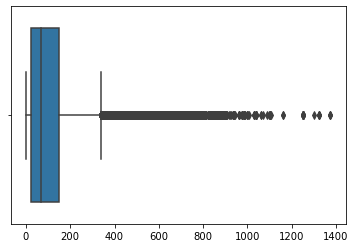

In [22]:
# ¿Entre qué valores oscilan los precios de unidad por producto?

# Es fundamental saber esto, ya que a pesar de que se intentó averiguar, se desconoce la moneda en que 
# están ingresados los montos. Esto es crítico, ya que por ejemplo no son lo mismo 20 dólares 
# estadounidenses que 20 pesos argentinos.

# Incluso, hasta cabe la posibilidad de que los precios no estén estandarizados a una sola moneda, sino que se
# hayan anotado en bruto según la moneda de la ciudad donde se realizó la venta.

sns.boxplot(x = (df_sales2012["Sales"] / df_sales2012["Sales Qty"]).round(2))

In [23]:
# Número de observaciones cuyo cálculo de "Sales" sobre "Sales Qty" arrojan outliers

number_observations = []
unity_price = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 
               700, 750, 800, 850, 900, 950, 1000, 1050, 1100,
               1150, 1200, 1250, 1300, 1350]

for value in unity_price:
    number_observations.append(((df_sales2012["Sales"] / df_sales2012["Sales Qty"]) > value).sum())

print("Number of Observations:", number_observations)
print("Price per Unity:", unity_price)

Number of Observations: [6777, 5945, 4866, 4362, 4135, 3500, 3148, 2603, 1897, 1502, 1064, 924, 437, 322, 125, 77, 48, 34, 24, 22, 20, 20, 10, 5]
Price per Unity: [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350]


<AxesSubplot:xlabel='Price per Unity', ylabel='Number of Observations'>

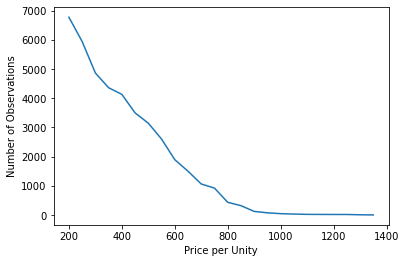

In [24]:
outliers = pd.DataFrame({"Price per Unity": unity_price, "Number of Observations": number_observations})
    
sns.lineplot(data = outliers, x = "Price per Unity", y = "Number of Observations")

In [25]:
# Nótese los valores extremos tras el umbral de $350 por producto. Por ejemplo,
# la observación 94, con las galletitas que valen $563.61.

df_sales2012[(df_sales2012["Sales"] / df_sales2012["Sales Qty"]) > 350][["Item Desc", "Sales", "Sales Qty"]]

Item Desc     Sales  Sales Qty
0               Cutting Edge Sliced Ham   -573.38         -1
94          Best Choice Graham Crackers    563.61          1
96                  Even Better 1% Milk    741.45          1
97     Just Right Fancy Canned Sardines    743.04          2
98         Better Fancy Canned Sardines    824.39          1
...                                 ...       ...        ...
36432      Golden Frozen Chicken Thighs   2272.32          4
36436             Gorilla Cheese Spread   3900.97          4
36438         Bravo Large Canned Shrimp   9279.07         20
36442                 Imagine Popsicles  22494.08         42
36443                Discover Manicotti  50370.86         80

[4362 rows x 3 columns]

In [26]:
df_sales2012[df_sales2012["Item Desc"] == "Best Choice Graham Crackers"][["Item Desc", "Sales", "Sales Qty"]]

# Interesante ver cómo el precio por unidad varía, a partir de filtrar por un producto aleatorio.
# Posibilidades:
# - ¿Errores en el ingreso de datos?
# - ¿Precio "en bruto", según la moneda de cada ciudad?
# - ¿Precio estandarizado a una sola moneda, tan sólo reflejando los distintos precios en cada ciudad?

Item Desc     Sales  Sales Qty
94     Best Choice Graham Crackers    563.61          1
1367   Best Choice Graham Crackers     23.21         10
1707   Best Choice Graham Crackers     15.88         50
1952   Best Choice Graham Crackers      6.36         20
4298   Best Choice Graham Crackers      1.63          5
5089   Best Choice Graham Crackers      0.33          1
7032   Best Choice Graham Crackers      1.98          6
7042   Best Choice Graham Crackers     13.09         22
7641   Best Choice Graham Crackers  10876.59         22
7794   Best Choice Graham Crackers      1.27          4
8939   Best Choice Graham Crackers   3460.73          7
9236   Best Choice Graham Crackers    541.07          1
9262   Best Choice Graham Crackers      4.76          8
10401  Best Choice Graham Crackers     23.21         10
10741  Best Choice Graham Crackers     15.88         50
10986  Best Choice Graham Crackers      6.36         20
12207  Best Choice Graham Crackers      3.18         10
13307  Best Choice Graham Crackers      1.72          5
13310  Best Choice Graham Crackers      3.29         10
13467  Best Choice Graham Crackers      6.36         20
14848  Best Choice Graham Crackers      1.79          3
15518  Best Choice Graham Crackers      4.17          7
16926  Best Choice Graham Crackers      1.34          4
17408  Best Choice Graham Crackers     13.49          5
19544  Best Choice Graham Crackers     23.21         10
24550  Best Choice Graham Crackers     15.37          6
25211  Best Choice Graham Crackers      1.98          6
25221  Best Choice Graham Crackers     13.09         22
25348  Best Choice Graham Crackers      0.65          2
25664  Best Choice Graham Crackers      0.33          1
29306  Best Choice Graham Crackers   1055.03          2
31256  Best Choice Graham Crackers      1.66          5
32465  Best Choice Graham Crackers      8.09          3
32748  Best Choice Graham Crackers  10876.59         22
34068  Best Choice Graham Crackers      5.62          2
36243  Best Choice Graham Crackers   1055.03          2

### Data Cleaning

In [27]:
# Borrar "Invoice Date", "%KEY" y "Promised Delivery Date". No aportan nueva información.

df_sales2012.drop(["%KEY", "Invoice Date", "Promised Delivery Date"],axis = 1, inplace = True)
df_sales2012.columns

Index(['Cost', 'Customer Number', 'Date', 'GrossSales', 'Invoice Number',
       'Item Desc', 'Item Number', 'Margin', 'Order Number', 'Sales',
       'Sales Qty', 'Sales Rep Number'],
      dtype='object')

In [28]:
# Las columnas "Invoice Number", "Order Number" y "Sales Rep Number" no serán utilizadas.

df_sales2012.drop(["Invoice Number", "Order Number", "Sales Rep Number"],axis = 1, inplace = True)
df_sales2012.columns

Index(['Cost', 'Customer Number', 'Date', 'GrossSales', 'Item Desc',
       'Item Number', 'Margin', 'Sales', 'Sales Qty'],
      dtype='object')

In [29]:
# Reordenar las columnas que quedan: "Date", "Item Number", "Item Desc", "Cost", "Margin", "Sales", "GrossSales",
# "Sales Qty", "Customer Number", "Sales Rep Number", "Invoice Number", "Order Number"

df_sales2012 = df_sales2012.reindex(columns = ["Date", "Item Number", "Item Desc", 
                           "Cost", "Margin", "Sales", "GrossSales", 
                           "Sales Qty", "Customer Number"])
df_sales2012.head()

Date  Item Number                   Item Desc    Cost  Margin   Sales  \
0 2012-12-31        10696     Cutting Edge Sliced Ham -513.15  -60.23 -573.38   
1 2012-12-31        10009  Washington Cranberry Juice -105.93  -98.73 -204.66   
2 2012-12-31        10385             Moms Sliced Ham  -88.07  -77.73 -165.80   
3 2012-12-31        10215                 Tip Top Lox  -43.12  -75.25 -118.37   
4 2012-12-31        10965        Just Right Beef Soup  -37.98  -64.35 -102.33   

   GrossSales  Sales Qty  Customer Number  
0   -573.3835         -1         10012715  
1   -204.6638         -2         10012715  
2   -165.8016         -3         10012715  
3   -118.3703         -1         10012715  
4   -102.3319         -1         10012715

Quedó claro que hay varias columnas con valores negativos que deberán ser investigadas. Se dejó constancia de las mismas por si se desearan exploraciones ulteriores. Dado que los datasets no fueron acompañados con descripciones de cada columna harán falta averiguaciones en ese sentido también.

Para el presente análisis sólo compete la columna "Sales", que será usada para las visualizaciones. Por lo tanto, las observaciones con valores negativos serán eliminados, ya que ante un dataset de aprox. 36500 observaciones esas 900 observaciones anormales no constituyen un inconveniente tan crítico.

In [30]:
df_sales2012.drop(negative_sales, inplace = True)
df_sales2012.describe()

Item Number           Cost         Margin          Sales  \
count  35475.000000   35475.000000   35475.000000   35475.000000   
mean   10512.908358     692.928213     448.887242    1141.815455   
std      292.036694    6805.617979    3697.564553   10370.709629   
min    10002.000000       0.000000   -3764.400000       0.010000   
25%    10267.000000      18.800000      18.170000      43.430000   
50%    10527.000000      61.190000      50.470000     119.420000   
75%    10797.000000     204.735000     140.940000     340.400000   
max    11971.000000  366576.000000  164339.200000  517632.000000   

          GrossSales     Sales Qty  Customer Number  
count   35475.000000  35475.000000     3.547500e+04  
mean     1189.170662     20.601776     1.001712e+07  
std     10801.546337    312.569842     6.969882e+03  
min         0.005500      0.000000     1.000000e+07  
25%        45.239000      1.000000     1.001223e+07  
50%       124.399000      2.000000     1.001919e+07  
75%       354.532400      3.000000     1.002246e+07  
max    539200.000000  16000.000000     1.002758e+07

In [31]:
# Ahora que eliminamos las observaciones con valores negativos, ¿cuántas observaciones
# en "Sales" habrá con valores más grandes que "GrossSales", lo cual ahora sí daría a pensar 
# que están invertidas?

(df_sales2012["Sales"].round(2) > df_sales2012["GrossSales"].round(2)).sum()

0

En cuanto a los outliers, se tomó la determinación de eliminarlos por completo, ya que el costo de perder unas miles de observaciones es menor a tener observaciones con productos mundanos a un precio de unidad exorbitantemente erróneo. Existe el peligro de que estos outliers lleven a sobreestimar las ganancias que las visualizaciones arrojarán, lo cual constituiría un grave riesgo desde un punto de vista comercial, por lo que es menester adoptar un enfoque lo más conservador y precavido posible.

Para tomar esta decisión también se inspeccionó el dataset complementario de "Item Master", donde se constató que todos los productos son comidas y bebidas de uso diario. No hay otros productos, como ser electrodomésticos, que justificaran la existencia de estos outliers.

Por supuesto, un escenario óptimo hubiera sido disponer de la información sobre en qué moneda están los valores de venta siendo expresados, lo cual hubiera ayudado mucho para arribar a conclusiones más concretas. Sin embargo, con los razonamientos expuestos se considera que el curso de acción está justificado. 

Ahora bien, hay que considerar que, por una cuestión de equivalencia, el umbral elegido para establecer el corte de precio de unidad sea igual tanto para este dataset como para su complementario, ya que si no se estaría estableciendo un "bias" innecesario, dado que ambos datasets exponen ventas de los mismos productos comestibles.

Tras analizar ambos line plots, se concluyó que un precio de unidad máximo de $225 es el umbral que definitivamente elimina todos los outliers, mientras que a la vez evita que se remuevan observaciones válidas. La proporción de eliminaciones no resultará tan dispareja, ya que debe recordarse que en este dataset sólo hay un año completo de observaciones, no uno y medio.

In [32]:
df_sales2012 = df_sales2012[((df_sales2012["Sales"] / df_sales2012["Sales Qty"]).round(2)) < 225]
df_sales2012.shape

(29288, 9)

<AxesSubplot:>

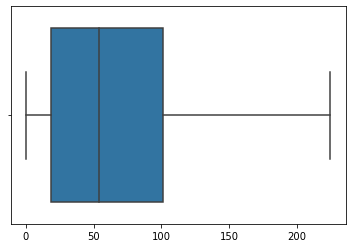

In [33]:
sns.boxplot(x = (df_sales2012["Sales"] / df_sales2012["Sales Qty"]).round(2))

In [34]:
# Asegurarse que las columnas con valores monetarios no tengan más de dos decimales

df_sales2012[["Cost", "Margin", "Sales", "GrossSales"]] = \
    df_sales2012[["Cost", "Margin", "Sales", "GrossSales"]].round(2)

In [35]:
df_sales2012.describe()

Item Number           Cost         Margin          Sales  \
count  29288.000000   29288.000000   29288.000000   29288.000000   
mean   10505.220534     532.964090     325.687167     858.651257   
std      283.925777    7272.604262    3852.897702   10993.881072   
min    10002.000000       0.000000   -3764.400000       0.010000   
25%    10267.000000      13.530000      14.690000      30.680000   
50%    10507.000000      44.700000      38.160000      87.955000   
75%    10717.000000     101.530000      79.147500     177.600000   
max    11971.000000  366576.000000  164339.200000  517632.000000   

          GrossSales     Sales Qty  Customer Number  
count   29288.000000  29288.000000     2.928800e+04  
mean      894.278909     23.771476     1.001714e+07  
std     11450.873131    343.819828     6.982669e+03  
min         0.010000      1.000000     1.000000e+07  
25%        31.960000      1.000000     1.001223e+07  
50%        91.550000      2.000000     1.001919e+07  
75%       185.000000      3.000000     1.002246e+07  
max    539200.000000  16000.000000     1.002758e+07

In [36]:
# Habiendo finalizado con la limpieza de datos, es hora de guardar los cambios en un nuevo XLSX.

df_sales2012.to_excel("cleaned_sales2012.xlsx", 
                       sheet_name = "Sales 2012", 
                       columns = df_sales2012.columns)